# Calibration plots for the pop + epi calibration

This plots the results from `run_model_autocals.py` (whole calibration).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import atomica as at
import os
from os.path import isfile
import re
import sciris as sc

In [3]:
#load typhoid project
inputs = '../assets'
F = at.ProjectFramework(f'{inputs}/T7_framework.xlsx')
D = at.ProjectData.from_spreadsheet(f'{inputs}/T7_databook.xlsx', framework=F)
P = at.Project(framework=F, databook=D, do_run=False)
P.settings.update_time_vector(start=2000, end=2040, dt=1/52)

# Plot uncalibrated

Elapsed time for running "default": 3.87s


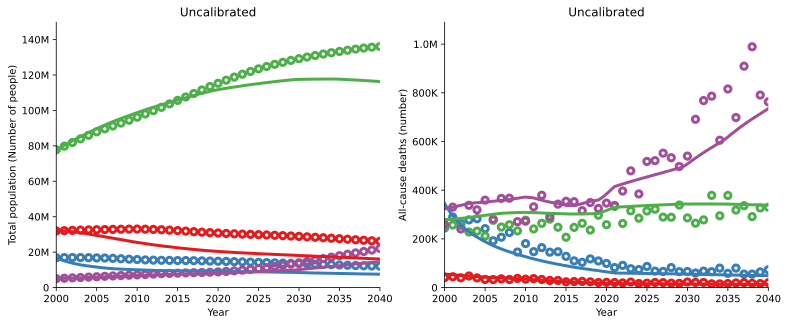

In [4]:
cal0 = P.make_parset()
res0 = P.run_sim(parset=cal0, result_name =  'Uncalibrated')
d = at.PlotData(res0, outputs=['alive', 'deaths'], project=P)
at.plot_series(d, axis='pops', data=P.data, n_cols=2, legend_mode='none');

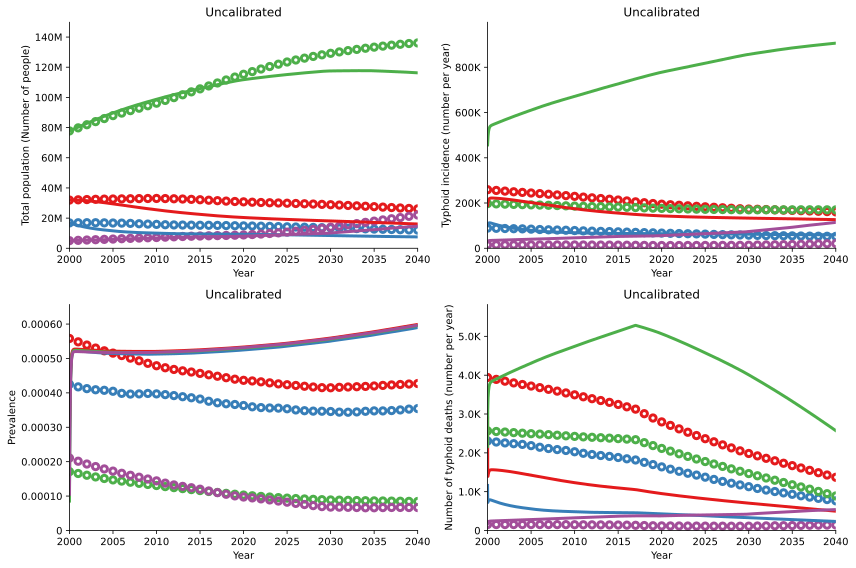

In [5]:
d = at.PlotData(res0, outputs=['alive','typ_incidence', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(12,8)
fig.tight_layout()

# Load in calibrations

In [6]:
calfile= "typ_calibration.xlsx"
print(calfile)
cal = P.make_parset()   
cal = cal.load_calibration(f'{calfile}')
res1 = P.run_sim(parset=cal, result_name =  'Complete YAML calibration')

WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


typ_calibration.xlsx


Elapsed time for running "default": 2.78s


# Plot calibrations

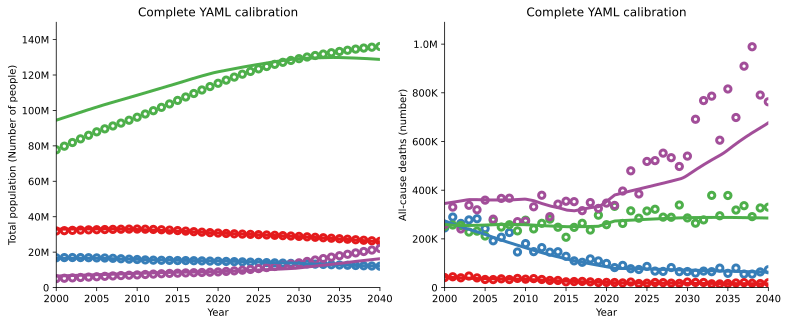

In [7]:
d = at.PlotData(res1, outputs=['alive', 'deaths'], project=P)
at.plot_series(d, axis='pops', data=P.data, n_cols=2, legend_mode='none');

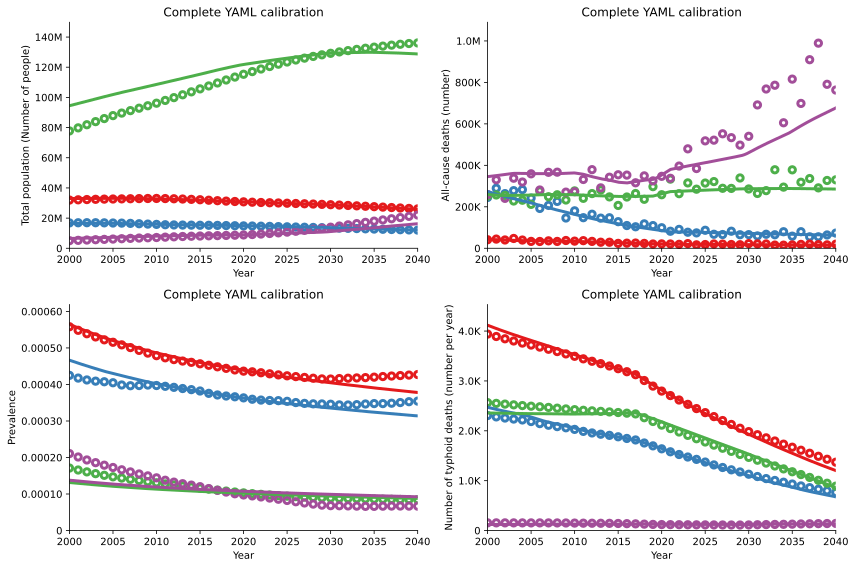

In [8]:
d = at.PlotData(res1, outputs=['alive','deaths', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(12,8)
fig.tight_layout()

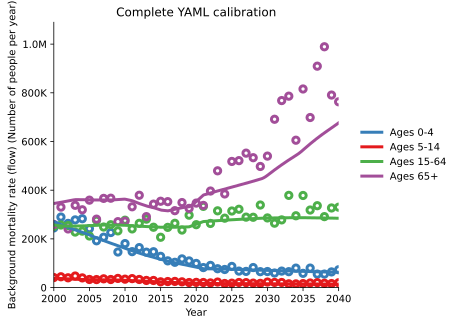

In [9]:
#display deaths
d = at.PlotData(res1, outputs='d_rate:flow', project=P) 
for s in d.series:
    s.data_label = 'deaths'
at.plot_series(d,axis='pops',data=P.data);

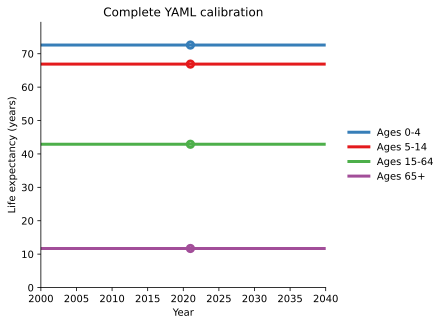

In [10]:
#display other typh vars
d = at.PlotData(res1, outputs=['life_exp'], project=P)
at.plot_series(d,axis='pops',data=P.data);